In [23]:
#author:fkw
#creat time:2021//11/30
#coding:utf-8
#version: V1.0
'''
可以求解任何纬度的函数，函数的纬度=dna_num
x_bound为自变量的取值矩阵
纬度不同时需要对fitness函数进行更改
'''
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#超参数
dna_size = 48  #dna长度
pop_size = 1024 #种群个体数
dna_num=2 #dna条数
crossover_rate=0.8 #交叉互换强度
mutation_rate=0.005 #变异强度
N_epoch = 50 #迭代次数
x_bound = [[-5.12, 5.12],[-5.12, 5.12]]#自变量的取值范围，矩阵形式size=(dna_size*2)

In [25]:
#定义函数
#二维球状函数
def F(x,y):
	return x**2+y**2

In [26]:
#适应函数
#得到(pop_size,1)的适应度矩阵
#因为如果直接返回pred可能是负值，而我们在计算概率的时候不能为负值。
#要进行处理，np.min表示取最小，为最大的负数，可以使全部只变成正的
# 1e-3为了让float进行相除防止小数点后的数被省略
def get_fitness(pop):
    pop=transDNA(pop)
    args=[]
    for i in range(dna_num):
        args.append(pop[:,i])
    fitness = F(*args)
    fitness=(fitness - np.min(fitness)) + 1e-3
    return fitness

In [27]:
#DNA编码转换
#DNA用pop矩阵存储，数值为布尔值，pop.shape=(pop_size,dna_size)
#在实际问题中 pop.shape=(pop_size,dna_size*dna_num)
#将pop矩阵映射到变量的限定范围
#pop = np.random.randint(2, size=(pop_size,dna_size*dna_num))
def transDNA(pop):
    ans=np.zeros((pop_size,dna_num))
    #计算dna对应的数值,(pop_size,dna_size*dna_num)--->(pop_size,dna_num)
    for i in range(dna_num):
        ans[:,i]=pop[:,i::dna_num].dot(2**np.arange(dna_size)[::-1])*(x_bound[i][1]-x_bound[i][0])/(2**dna_size-1)+x_bound[i][0]
        print(ans)
    return ans  #ans.shape=(pop_size,dna_num)



In [28]:
#基因突变
def mutation(child, mutation_rate=mutation_rate):
	#以mutation_rate的概率进行变异
	if np.random.rand() < mutation_rate: 	
		#随机产生一个实数，代表要变异基因的位置			
		mutate_point = np.random.randint(0, dna_size*dna_num)
		#将变异点的二进制为反转
		child[mutate_point] = child[mutate_point]^1 
	return child	

In [29]:
#交叉互换
def crossover_and_mutation(pop, crossover_rate= crossover_rate):
	new_pop = []
	#遍历种群中的每一个个体，将该个体作为父亲
	for father in pop:	
		#孩子先得到父亲的全部基因	
		child = father
		#一定概率发生交叉		
		if np.random.rand() < crossover_rate:			
			#随机选择选择另一个个体作为母亲
			mother = pop[np.random.randint(pop_size)]	
			#随机产生交叉的点
			cross_points = np.random.randint(low=0, high=dna_size*2)
			#孩子得到位于交叉点后的母亲的基因	
			child[cross_points:] = mother[cross_points:]	
		#每个后代有一定的机率发生变异	
		mutation(child)	
		new_pop.append(child)
	return new_pop

In [30]:
#自然选择，使用转轮法
def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(pop_size), size=pop_size, replace=True, p=(fitness)/(fitness.sum()))
    return pop[idx]

In [31]:
#输出最优值
def print_info(pop):
	fitness = get_fitness(pop)
	max_fitness_index = np.argmax(fitness)
	ans = transDNA(pop)
	x=ans[:,0]
	y=ans[:,1]
	print("最优的基因型：", pop[max_fitness_index])
	print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
	print("(x, y)对应的函数值:", F(x[max_fitness_index], y[max_fitness_index]))

In [32]:
#绘图，只限于二维
def plot_3d(ax):

	X = np.linspace(*x_bound[0], 100)
	Y = np.linspace(*x_bound[1], 100)
	X,Y = np.meshgrid(X, Y)
	Z = F(X, Y)
	ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
	ax.set_zlim(0,60)
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_zlabel('z')
	plt.pause(1)
	plt.show()

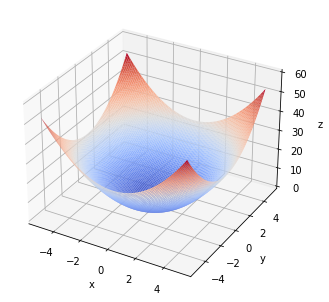

[[-5.12002638  0.        ]
 [-5.11999631  0.        ]
 [-5.12005695  0.        ]
 ...
 [-5.11996578  0.        ]
 [-5.1200425   0.        ]
 [-5.11998361  0.        ]]
[[-5.12002638 -5.11994955]
 [-5.11999631 -5.12003233]
 [-5.12005695 -5.12001174]
 ...
 [-5.11996578 -5.11995963]
 [-5.1200425  -5.12005927]
 [-5.11998361 -5.12004435]]
[[-5.11993814  0.        ]
 [-5.11995145  0.        ]
 [-5.12005695  0.        ]
 ...
 [-5.12005925  0.        ]
 [-5.12001806  0.        ]
 [-5.11999486  0.        ]]
[[-5.11993814 -5.11999073]
 [-5.11995145 -5.12004827]
 [-5.12005695 -5.12001174]
 ...
 [-5.12005925 -5.11999759]
 [-5.12001806 -5.12001873]
 [-5.11999486 -5.1199351 ]]
[[-5.11999954  0.        ]
 [-5.12001345  0.        ]
 [-5.11993721  0.        ]
 ...
 [-5.12003033  0.        ]
 [-5.12005447  0.        ]
 [-5.11994635  0.        ]]
[[-5.11999954 -5.1200142 ]
 [-5.12001345 -5.12002386]
 [-5.11993721 -5.12004612]
 ...
 [-5.12003033 -5.12000486]
 [-5.12005447 -5.11992296]
 [-5.11994635 -5.120

In [33]:
if __name__ == "__main__":
	fig = plt.figure()
	ax = Axes3D(fig)	
	#将画图模式改为交互模式，程序遇到plt.show不会暂停，而是继续执行
	plt.ion()
	plot_3d(ax)

	pop = np.random.randint(2, size=(pop_size, dna_size*dna_num)) 
	#迭代N代
	for _ in range(N_epoch):
		ans = transDNA(pop)
		x=ans[:,0]
		y=ans[:,1]
		if 'sca' in locals(): 
			sca.remove()
		sca = ax.scatter(x, y, F(x,y), c='black', marker='o');plt.show();plt.pause(0.1)
		pop = np.array(crossover_and_mutation(pop, crossover_rate))
		#F_values = F(translateDNA(pop)[0], translateDNA(pop)[1])#x, y --> Z matrix
		fitness = get_fitness(pop)
		pop = select(pop, fitness) #选择生成新的种群
	
	print_info(pop)
	plt.ioff()
	plot_3d(ax)